In [84]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
city_data_to_load = os.path.join('..', 'Resources', 'city_data.csv')

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [86]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [87]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [88]:
# screening for city_data_df
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [89]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [90]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [91]:
types = list(city_data_df['type'].unique())
dict_types = {}
for i in types:
    dict_types[i]=sum(city_data_df['type']==i)

dict_types

{'Urban': 66, 'Suburban': 36, 'Rural': 18}

In [92]:
# screening for ride_data_df
ride_data_df.count()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [93]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [94]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

In [95]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [96]:
#create seperate df for each city
urban_cities_df= pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df= pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df= pyber_data_df[pyber_data_df['type']=='Rural']

In [97]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [98]:
# get the total number of riders by city type
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']

In [99]:
# get the average fare by city type
urban_cities_average_fare = urban_cities_df.groupby('city').mean()['fare']
suburban_cities_average_fare = suburban_cities_df.groupby('city').mean()['fare']
rural_cities_average_fare = rural_cities_df.groupby('city').mean()['fare']

In [100]:
# get the average number of drivers by city type
urban_cities_drivers = urban_cities_df.groupby('city').mean()['driver_count']
suburban_cities_drivers = suburban_cities_df.groupby('city').mean()['driver_count']
rural_cities_drivers = rural_cities_df.groupby('city').mean()['driver_count']

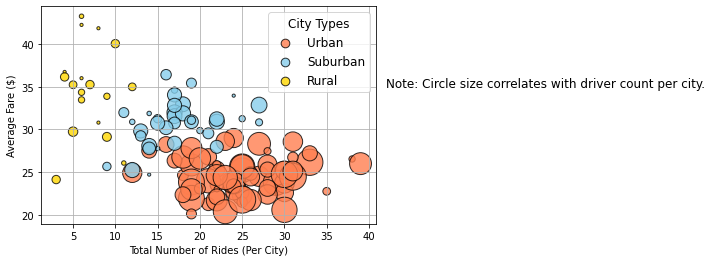

In [102]:
# create the bubble chart 
fig, ax = plt.subplots()
ax.scatter(urban_ride_count, 
           urban_cities_average_fare, 
           s=10*urban_cities_drivers, 
           label='Urban', c = 'coral',
           alpha = 0.8,
           edgecolor='black',
           linewidth=1)

ax.scatter(suburban_ride_count, 
           suburban_cities_average_fare, 
           s=10*suburban_cities_drivers, label = 'Suburban',
           c = 'skyblue',
           alpha = 0.8,
           edgecolor='black',
           linewidth=1)

ax.scatter(rural_ride_count, 
           rural_cities_average_fare, 
           s=10*rural_cities_drivers, label = 'Rural',
           c = 'gold',
           alpha = 0.8,
           edgecolor='black',
           linewidth=1)
plt.grid()
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# modify legend 
lgnd = plt.legend(fontsize="12", 
                  mode="Expanded",
                  scatterpoints=1, 
                  loc="best", 
                  title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig("analysis/Fig1.png")
plt.show()
